In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import timeit
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn import tree
from sklearn import svm
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')

In [2]:
spambase = open(r"spambase.data")
data = pd.DataFrame(spambase)
data.head()


,0
0,"0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32..."
1,"0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,0.2..."
2,"0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0...."
3,"0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,0.31,0.31,0..."
4,"0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,0.31,0.31,0..."


In [3]:
data = data[0].str.split(',')
feature_numbers = len(data.iloc[0]) - 1
print("the number of words is", feature_numbers)


the number of words is 57


In spam detection the number of features equals to the number of words. 



In [4]:
col = ['feature%d'%i for i in range(1,59)]
rows = ['data%d'%i for i in range(1,4602)]
df = pd.DataFrame(index=rows, columns=col)
for i in range(4601):
  df.iloc[i] = (data[i])


for i in range(58):
    df[df.columns[i]] = pd.to_numeric(df[df.columns[i]]) 
df = df.rename(columns={'feature58' : 'label'})
df


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,label
data1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
data2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
data3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
data4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
data5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
data4597,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
data4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
data4599,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
data4600,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


As the above table demonstrates the dataset includes 57 features that each feature stands for a word. Also the probabilities denoted to words according to each data(email) is the probability of occuring words in a particular email(sample data).

In addition, the last column of the above table provides labels of data samples. In other words, since a binary classification problem is given, labels clarify that if a sample data(email) is considered as spam email or not.

In [5]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
df.info(verbose=False, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
Index: 4601 entries, data1 to data4601
Columns: 58 entries, feature1 to label
dtypes: float64(55), int64(3)
memory usage: 2.1+ MB


In [7]:
x = df[df.columns[[i for i in range(0, 57)]]]
y = df['label'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

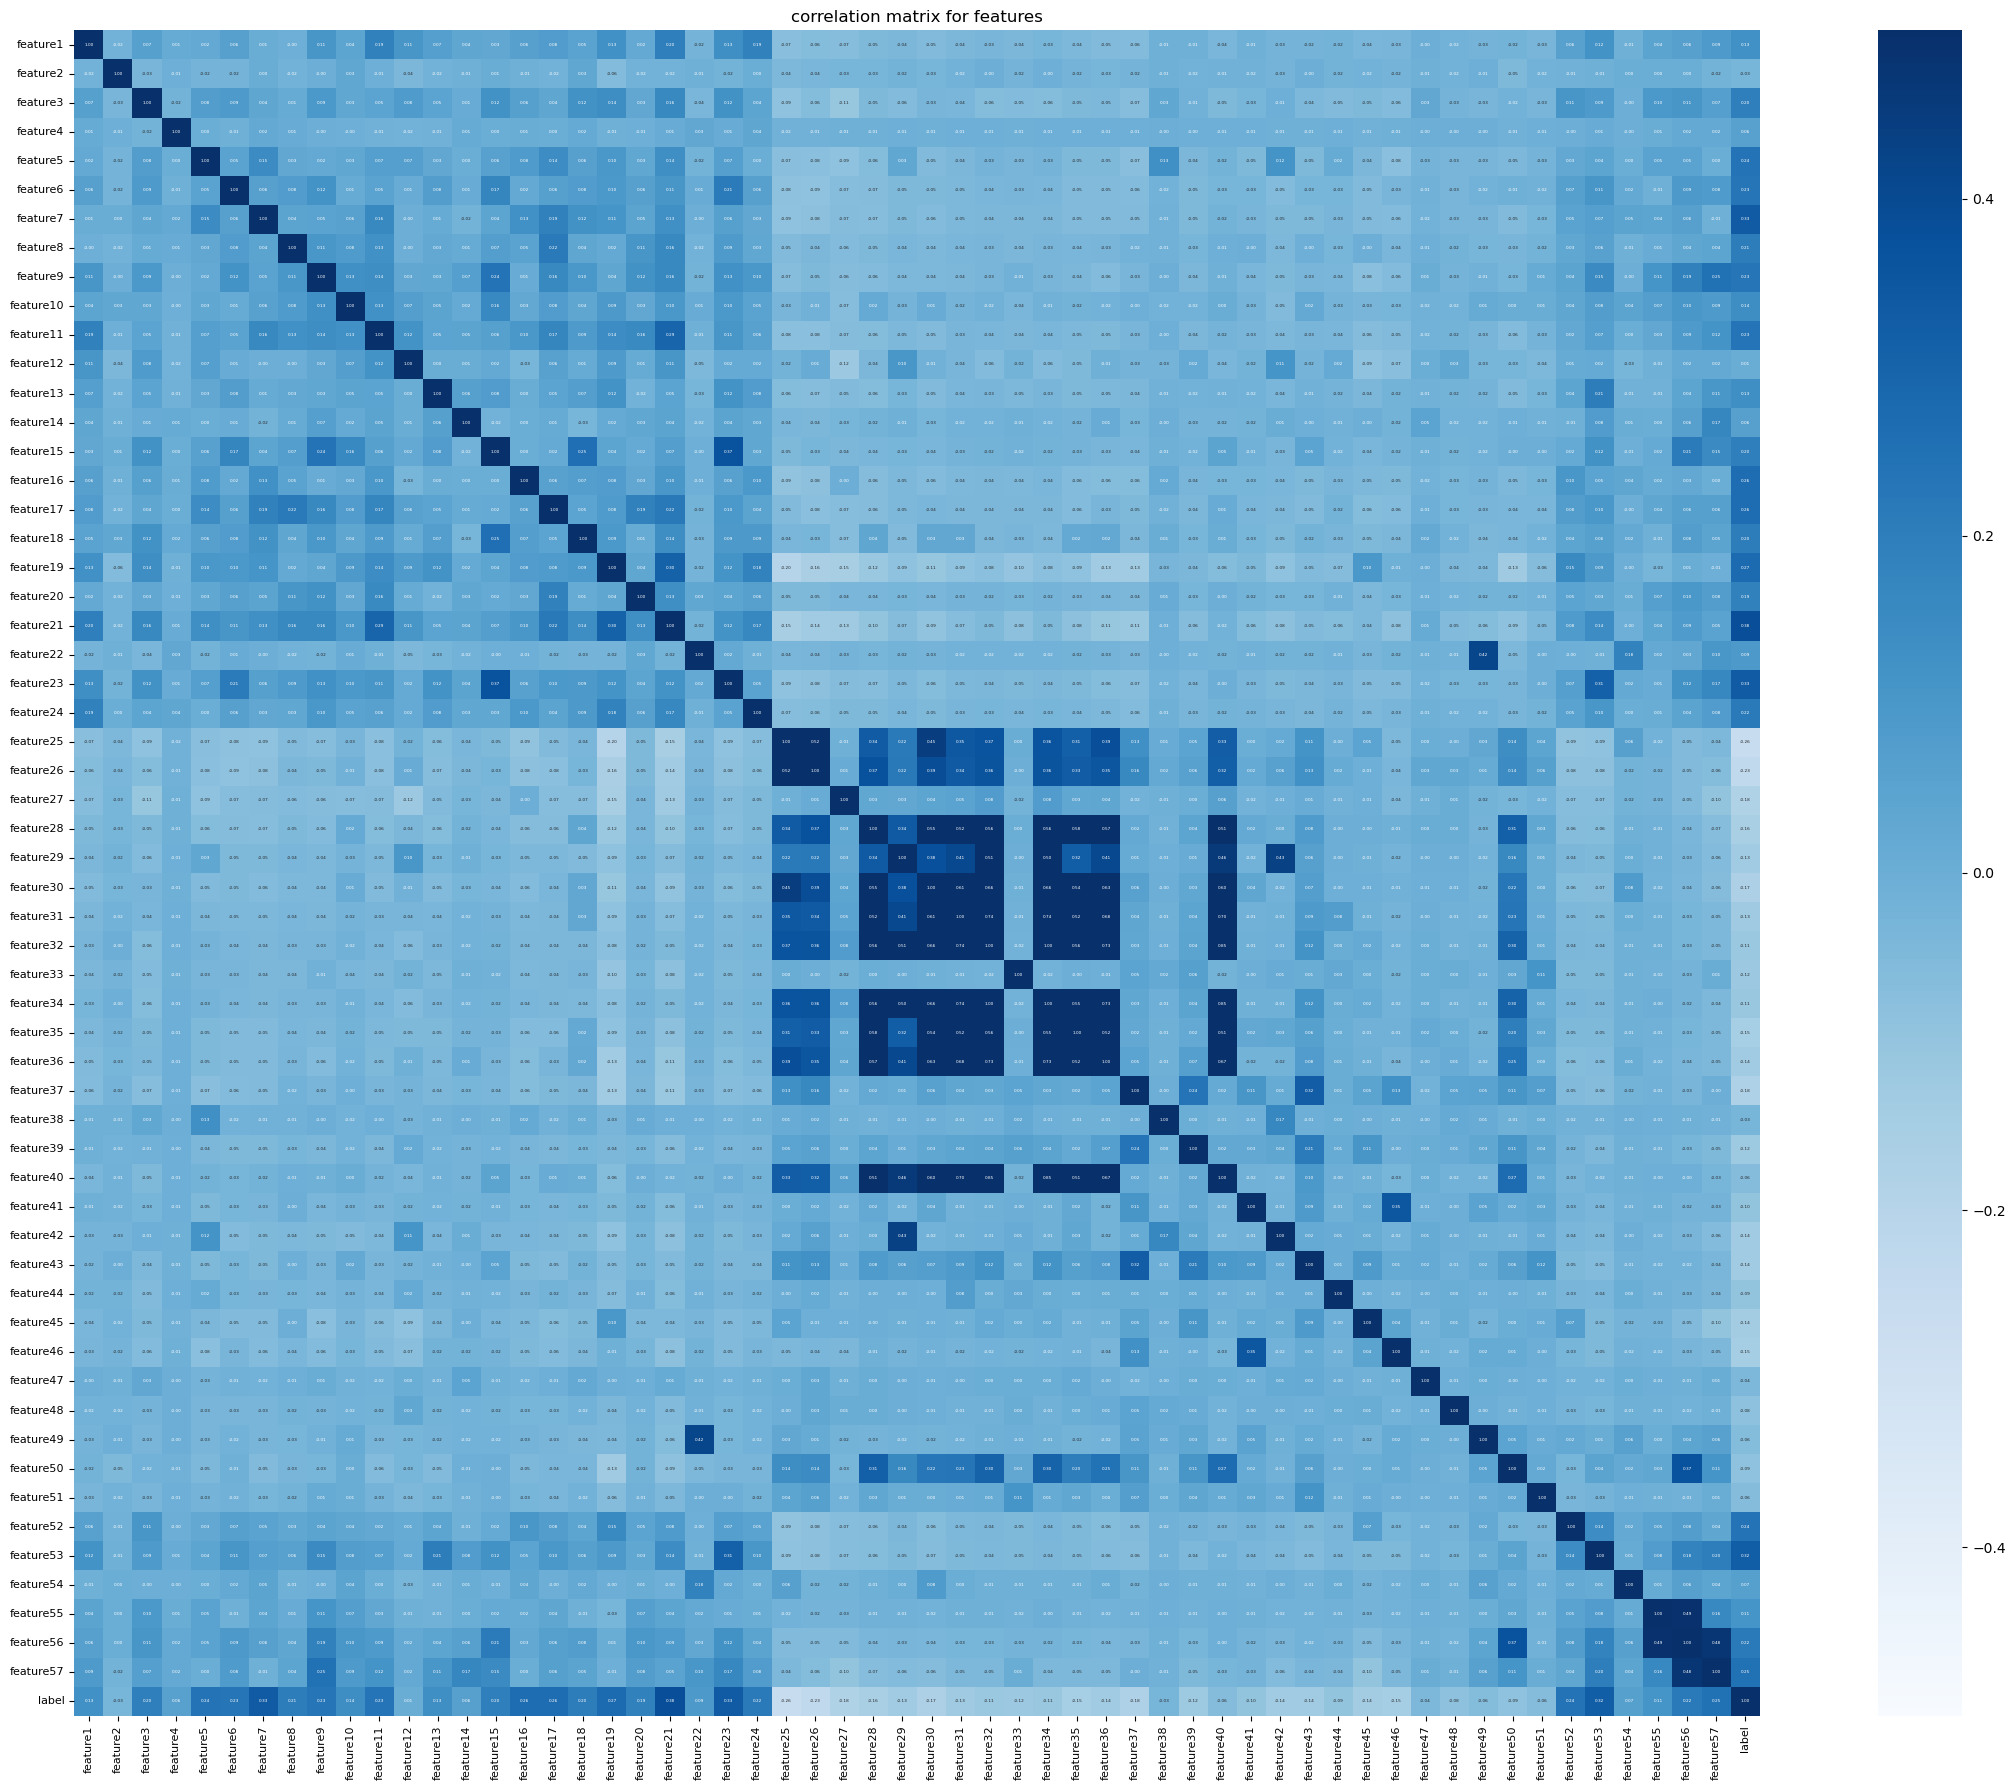

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix for features')
plt.tight_layout()

The above plot displays the correlation between features and labels. 

As it is crystal clear "feature 25" up to "feature 36" are correlated also "feature 40" is correlated to other features too. so for better performance of algorithms correlated features can be ommited that reduces the dimenssion of the problem and it prevents curse of dimenssionality..

Moreover labels have week corrrelations with the features.


In [9]:
col = ['KNN', 'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'Adaboost', 'Random Forest', 'Linear SVM', 'Nonlinear SVM' ]
row = ['Train Accuracy', 'Test Accuracy', 'Train Error', 'Test Error', 'Train Time', 'Test Time']
matrix = pd.DataFrame(index=row, columns=col)
matrix

,KNN,Decision Tree,Naive Bayes,Logistic Regression,Adaboost,Random Forest,Linear SVM,Nonlinear SVM
Train Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Train Error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test Error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Train Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **KNN ALgorithm**

In [10]:
k_range = range(1, 130, 10)
knn_val_scores = []
err_train = []
err_test = []
score_train = []
score_test = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, x_train, y_train, cv=5, scoring='accuracy')
    knn_val_scores.append(scores.mean())

    knn.fit(x_train, y_train)
    y_train_pred = knn.predict(x_train)
    mse_train = sum(np.square(y_train_pred - y_train)) / x_train.size
    err_train.append(mse_train)
    
    y_test_pred = knn.predict(x_test)
    mse_test = sum(np.square(y_test_pred - y_test)) / x_test.size
    err_test.append(mse_test)

    acc = knn.score(x_train, y_train)
    score_train.append(acc)
    acc = knn.score(x_test, y_test) 
    score_test.append(acc) 
 

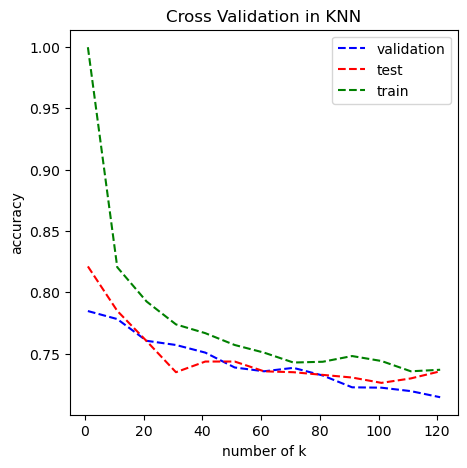

In [11]:
plt.figure(figsize = (5,5))
plt.title('Cross Validation in KNN')
plt.xlabel("number of k")
plt.ylabel("accuracy")
plt.plot(k_range, knn_val_scores, 'b--',
          k_range, score_test,'r--',
        k_range, score_train,'g--')    
plt.legend(['validation', 'test', 'train'])
plt.show() 

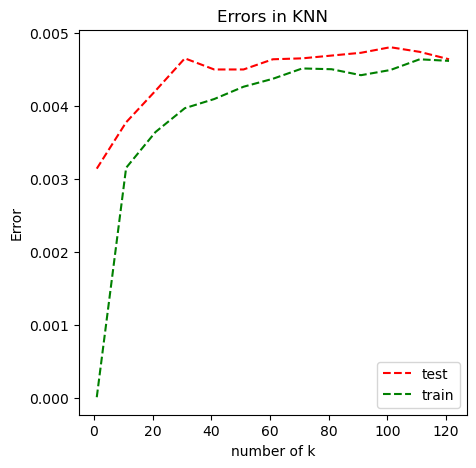

In [12]:
plt.figure(figsize = (5,5))    
plt.title('Errors in KNN')   
plt.xlabel("number of k")
plt.ylabel("Error")
plt.plot(k_range, err_test,'r--',
        k_range, err_train,'g--') 
plt.legend(['test', 'train'])
plt.show() 

According to above plots the best parameter for KNN is K = 10

In [56]:
start = timeit.default_timer()

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)
train_acc = knn.score(x_train, y_train)
print(f"The accuracy on the training data is: {train_acc:.2f}")
y_train_pred = knn.predict(x_train)
train_err = sum((y_train_pred - y_train)**2) / x_train.shape[0]
print(f"The error on training data is: {train_err:.2f}")

stop = timeit.default_timer()
knn_train_time= stop - start
print('Time: ', knn_train_time) 

matrix['KNN']['Train Accuracy'] = train_acc
matrix['KNN']['Train Error'] = train_err
matrix['KNN']['Train Time'] = knn_train_time

The accuracy on the training data is: 0.82
The error on training data is: 0.18
Time:  4.060815799999546


In [57]:
start = timeit.default_timer()

test_acc = knn.score(x_test, y_test)
print(f"The accuracy on the testing data is: {test_acc:.2f}")
y_test_pred = knn.predict(x_test)
test_err = sum((y_test_pred - y_test)**2) / x_test.shape[0]
print(f"The error on testing data is: {test_err:.2f}")

stop = timeit.default_timer()
knn_test_time= stop - start
print('Time: ', knn_test_time) 

matrix['KNN']['Test Accuracy'] = test_acc
matrix['KNN']['Test Error'] = test_err
matrix['KNN']['Test Time'] = knn_test_time

The accuracy on the testing data is: 0.78
The error on testing data is: 0.22
Time:  1.4783815999999206


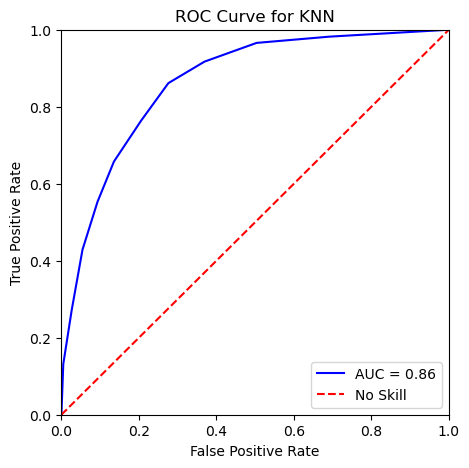

In [15]:
y_score = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('ROC Curve for KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--', label = 'No Skill')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **Decision Tree Algorithm**

In [16]:
n_range = range(3, 120)
dt_val_scores = []
err_train = []
err_test = []
score_train = []
score_test = []

for n in n_range:
    dt = DecisionTreeClassifier(
        criterion='entropy', max_depth=n)
    scores = cross_val_score(
        dt, x_train, y_train, cv= 5, scoring='accuracy')
    dt_val_scores.append(scores.mean())

    dt.fit(x_train, y_train)
    y_train_pred = dt.predict(x_train)
    mse_train = sum(np.square(y_train_pred - y_train)) / x_train.shape[0]
    err_train.append(mse_train)
    
    y_test_pred = dt.predict(x_test)
    mse_test = sum(np.square(y_test_pred - y_test)) / x_test.shape[0]
    err_test.append(mse_test)

    acc = dt.score(x_train, y_train)
    score_train.append(acc)
    acc = dt.score(x_test, y_test) 
    score_test.append(acc) 


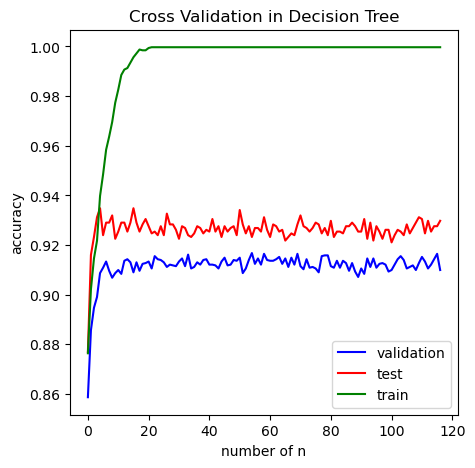

In [22]:
plt.figure(figsize = (5,5))
plt.title('Cross Validation in Decision Tree')
plt.xlabel("number of n")
plt.ylabel("accuracy")
plt.plot(dt_val_scores, 'b-',
          score_test,'r-',
        score_train,'g-')    
plt.legend(['validation', 'test', 'train'])
plt.show() 

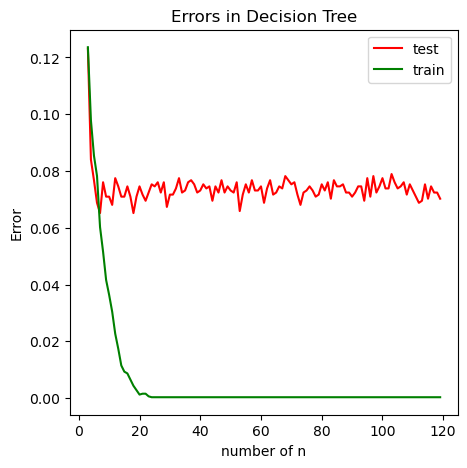

In [23]:
plt.figure(figsize = (5,5))    
plt.title('Errors in Decision Tree')   
plt.xlabel("number of n")
plt.ylabel("Error")
plt.plot(n_range, err_test,'r-',
        n_range, err_train,'g-') 
plt.legend(['test', 'train'])
plt.show() 

According to above plots the best parameter for Deision Tree is n = 15

In [58]:
start = timeit.default_timer()

DTclassifier = DecisionTreeClassifier(
    criterion='entropy', max_depth=15)
DTclassifier.fit(x_train, y_train)
dt_train_acc = DTclassifier.score(x_train, y_train)
print('The accuracy on training data is',dt_train_acc)
y_train_pred = DTclassifier.predict(x_train)
dt_train_err = sum((y_train_pred - y_train)**2) / x_train.shape[0]
print('The error on training data is',dt_train_err)

stop = timeit.default_timer()
dt_train_time= stop - start
print('Time: ', dt_train_time)

matrix['Decision Tree']['Train Accuracy'] = dt_train_acc
matrix['Decision Tree']['Train Error'] = dt_train_err
matrix['Decision Tree']['Train Time'] = dt_train_time

The accuracy on training data is 0.9906832298136646
The error on training data is 0.009316770186335404
Time:  0.2900048000001334


In [59]:
start = timeit.default_timer()

dt_test_acc = DTclassifier.score(x_test, y_test)
print('The accuracy on testing data is',dt_test_acc)
y_test_pred = DTclassifier.predict(x_test)
dt_test_err = sum((y_test_pred - y_test)**2) / x_test.shape[0]
print('The error on testing data is',dt_test_err)

stop = timeit.default_timer()
dt_test_time= stop - start
print('Time: ', dt_test_time)

matrix['Decision Tree']['Test Accuracy'] = dt_test_acc
matrix['Decision Tree']['Test Error'] = dt_test_err
matrix['Decision Tree']['Test Time'] = dt_test_time

The accuracy on testing data is 0.9297610427226647
The error on testing data is 0.07023895727733527
Time:  0.02857769999991433


[Text(0.7791176470588236, 0.96875, 'X[52] <= 0.046\nentropy = 0.962\nsamples = 3220\nvalue = [1977, 1243]'),
 Text(0.6168823529411764, 0.90625, 'X[6] <= 0.06\nentropy = 0.77\nsamples = 2411\nvalue = [1867, 544]'),
 Text(0.4676470588235294, 0.84375, 'X[51] <= 0.196\nentropy = 0.632\nsamples = 2200\nvalue = [1850, 350]'),
 Text(0.3291764705882353, 0.78125, 'X[24] <= 0.015\nentropy = 0.408\nsamples = 1766\nvalue = [1622, 144]'),
 Text(0.23670588235294118, 0.71875, 'X[4] <= 0.055\nentropy = 0.539\nsamples = 1136\nvalue = [996, 140]'),
 Text(0.15905882352941175, 0.65625, 'X[26] <= 0.045\nentropy = 0.378\nsamples = 915\nvalue = [848, 67]'),
 Text(0.15152941176470588, 0.59375, 'X[44] <= 0.38\nentropy = 0.466\nsamples = 677\nvalue = [610, 67]'),
 Text(0.1148235294117647, 0.53125, 'X[55] <= 11.5\nentropy = 0.544\nsamples = 520\nvalue = [455, 65]'),
 Text(0.07905882352941176, 0.46875, 'X[10] <= 0.23\nentropy = 0.38\nsamples = 366\nvalue = [339, 27]'),
 Text(0.07152941176470588, 0.40625, 'X[15] <

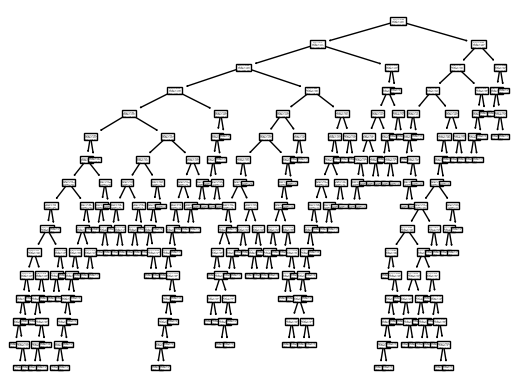

In [57]:
tree.plot_tree(DTclassifier)

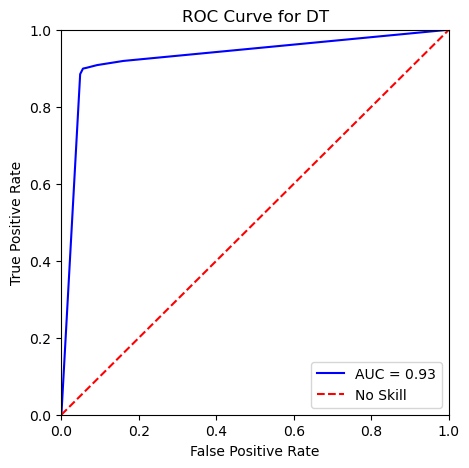

In [21]:
y_score = DTclassifier.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('ROC Curve for DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--', label = 'No Skill')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **Bernouli Naive Bayes Algorithm**

In [61]:
start = timeit.default_timer()

nb = BernoulliNB()
nb.fit(x_train, y_train)
nb_train_acc = nb.score(x_train, y_train)
print('The accuracy on training data is', nb_train_acc)
y_train_pred = nb.predict(x_train)
nb_train_err = sum(np.square(y_train_pred - y_train)) / x_train.shape[0]
print('The error on training data is', nb_train_err)

stop = timeit.default_timer()
nb_train_time= stop - start
print('Time: ', nb_train_time)

matrix['Naive Bayes']['Train Accuracy'] = nb_train_acc
matrix['Naive Bayes']['Train Error'] = nb_train_err
matrix['Naive Bayes']['Train Time'] = nb_train_time

The accuracy on training data is 0.8795031055900621
The error on training data is 0.12049689440993788
Time:  0.08172629999990022


In [60]:
start = timeit.default_timer()

nb_test_acc = nb.score(x_test, y_test)
print('The accuracy on test data is', nb_test_acc)
y_test_pred = nb.predict(x_test)
nb_test_err = sum(np.square(y_test_pred - y_test)) / x_test.shape[0]
print('The error on test data is', nb_test_err)

stop = timeit.default_timer()
nb_test_time= stop - start
print('Time: ', nb_test_time)

matrix['Naive Bayes']['Test Accuracy'] = nb_test_acc
matrix['Naive Bayes']['Test Error'] = nb_test_err
matrix['Naive Bayes']['Test Time'] = nb_test_time

The accuracy on test data is 0.9102099927588704
The error on test data is 0.08979000724112962
Time:  0.04847390000031737


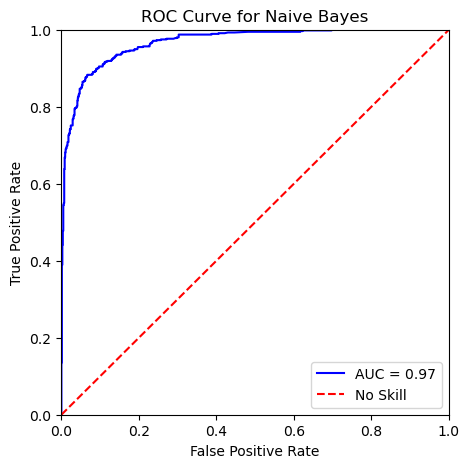

In [27]:
y_score = nb.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('ROC Curve for Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--', label = 'No Skill')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **Logistic Regression Algorithm**

In [62]:
start = timeit.default_timer()

LRclassifier = LogisticRegression(random_state=0)
LRclassifier.fit(x_train, y_train)

logreg_train_acc = LRclassifier.score(x_train, y_train)
print('The accuracy on training data is', logreg_train_acc)
y_train_pred = LRclassifier.predict(x_train)
logreg_train_err = sum(np.square(y_train_pred - y_train)) / x_train.shape[0]
print('The error on training data is', logreg_train_err)

stop = timeit.default_timer()
logreg_train_time= stop - start
print('Time: ', logreg_train_time)

matrix['Logistic Regression']['Train Accuracy'] = logreg_train_acc
matrix['Logistic Regression']['Train Error'] = logreg_train_err
matrix['Logistic Regression']['Train Time'] = logreg_train_time

The accuracy on training data is 0.9211180124223602
The error on training data is 0.07888198757763976
Time:  1.7293071000003692


In [63]:
start = timeit.default_timer()

logreg_test_acc = LRclassifier.score(x_test, y_test)
print('The accuracy on test data is', logreg_test_acc)
y_test_pred = LRclassifier.predict(x_test)
logreg_test_err = sum((y_test_pred - y_test)**2) / x_test.shape[0]
print('The error on test data is', logreg_test_err)

stop = timeit.default_timer()
logreg_test_time= stop - start
print('Time: ', logreg_test_time)

matrix['Logistic Regression']['Test Accuracy'] = logreg_test_acc
matrix['Logistic Regression']['Test Error'] = logreg_test_err
matrix['Logistic Regression']['Test Time'] = logreg_test_time

The accuracy on test data is 0.9268645908761767
The error on test data is 0.07313540912382331
Time:  0.03127369999947405


In [30]:
coef = LRclassifier.coef_[0]
intercept = LRclassifier.intercept_[0]
ans_lr = pd.DataFrame({'coef':coef, 'intercept':intercept})
ans_lr


,coef,intercept
0,-0.068266,-1.369025
1,-0.119552,-1.369025
2,0.112746,-1.369025
3,0.193527,-1.369025
4,0.769953,-1.369025
5,0.409070,-1.369025
6,1.064138,-1.369025
7,0.678005,-1.369025
8,0.196982,-1.369025
9,0.039276,-1.369025


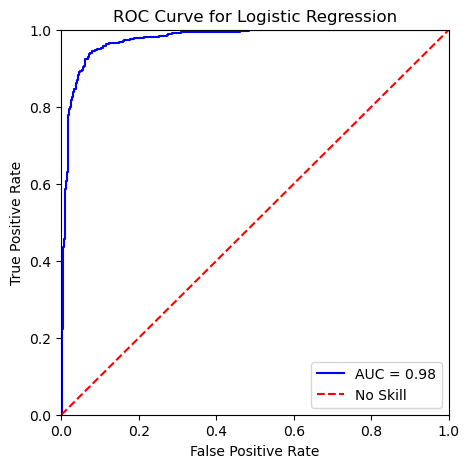

In [31]:
y_score = LRclassifier.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('ROC Curve for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--', label = 'No Skill')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **Adaboost Algorithm**

In [32]:
range_est = np.logspace(0,3,10)
range_est=np.unique(np.int32(range_est))
ada_val_scores = []
err_train = []
err_test = []
score_train = []
score_test = []
for nest in range_est:
    adaboost = AdaBoostClassifier(
        n_estimators=int(nest), learning_rate=1, random_state=42)
    scores = cross_val_score(
        adaboost, x_train, y_train, cv= 5, scoring='accuracy')
    ada_val_scores.append(scores.mean())

    adaboost.fit(x_train, y_train)
    y_train_pred = adaboost.predict(x_train)
    mse_train = sum(np.square(y_train_pred - y_train)) / x_train.shape[0]
    err_train.append(mse_train)
    
    y_test_pred = adaboost.predict(x_test)
    mse_test = sum(np.square(y_test_pred - y_test)) / x_test.shape[0]
    err_test.append(mse_test)

    acc = adaboost.score(x_train, y_train)
    score_train.append(acc)
    acc = adaboost.score(x_test, y_test) 
    score_test.append(acc) 

    

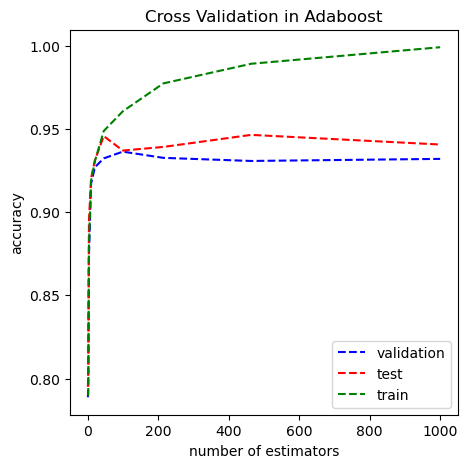

In [33]:
plt.figure(figsize = (5,5))
plt.title('Cross Validation in Adaboost')
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.plot(range_est, ada_val_scores, 'b--',
          range_est, score_test,'r--',
        range_est, score_train,'g--')    
plt.legend(['validation', 'test', 'train'])
plt.show() 

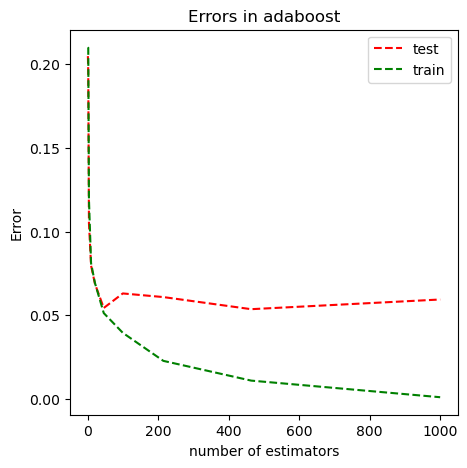

In [34]:
plt.figure(figsize = (5,5))    
plt.title('Errors in adaboost')   
plt.xlabel("number of estimators")
plt.ylabel("Error")
plt.plot(range_est, err_test,'r--',
        range_est, err_train,'g--') 
plt.legend(['test', 'train'])
plt.show() 

According to above plots the best parameter for Adaboost is n = 200

In [64]:
start = timeit.default_timer()

adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state=42)
model1 = adaboost.fit(x_train, y_train)
ada_train_acc = adaboost.score(x_train, y_train)
print('The accuracy on train data is', ada_train_acc)
y_train_pred = adaboost.predict(x_train)
ada_train_err = sum(np.square(y_train_pred - y_train)) / x_train.shape[0]
print('The error on training data is', ada_train_err)

stop = timeit.default_timer()
ada_train_time= stop - start
print('Time: ', ada_train_time)

matrix['Adaboost']['Train Accuracy'] = ada_train_acc
matrix['Adaboost']['Train Error'] = ada_train_err
matrix['Adaboost']['Train Time'] = ada_train_time

The accuracy on train data is 0.9757763975155279
The error on training data is 0.02422360248447205
Time:  7.368292299999666


In [65]:
start = timeit.default_timer()

ada_test_acc = adaboost.score(x_test, y_test)
print('The accuracy on train data is', ada_test_acc)
y_train_pred = adaboost.predict(x_train)
ada_test_err = sum(np.square(y_test_pred - y_test)) / x_test.shape[0]
print('The error on testing data is', ada_test_err)

stop = timeit.default_timer()
ada_test_time= stop - start
print('Time: ', ada_test_time)

matrix['Adaboost']['Test Accuracy'] = ada_test_acc
matrix['Adaboost']['Test Error'] = ada_test_err
matrix['Adaboost']['Test Time'] = ada_test_time

The accuracy on train data is 0.939898624185373
The error on testing data is 0.07313540912382331
Time:  1.6932236000002376


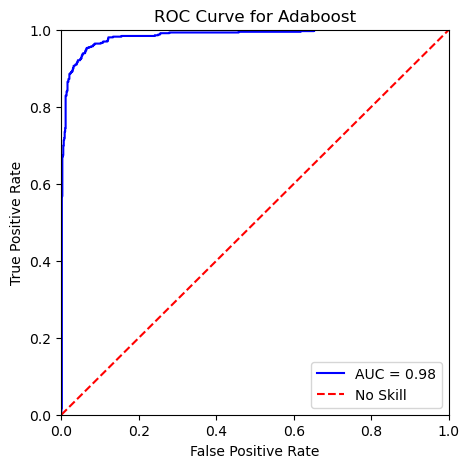

In [37]:
y_score = adaboost.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('ROC Curve for Adaboost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--', label = 'No Skill')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **Random Forest Algorithm**

In [38]:
range_est = np.logspace(0,3,10)
range_est=np.unique(np.int32(range_est))
rf_val_scores = []
err_train = []
err_test = []
score_train = []
score_test = []
for nest in range_est:
    rf = RandomForestClassifier(n_estimators = int(nest), random_state=42)
    scores = cross_val_score(
        rf, x_train, y_train, cv= 5, scoring='accuracy')
    rf_val_scores.append(scores.mean())

    rf.fit(x_train, y_train)
    y_train_pred = rf.predict(x_train)
    mse_train = sum(np.square(y_train_pred - y_train)) / x_train.shape[0]
    err_train.append(mse_train)
    
    y_test_pred = adaboost.predict(x_test)
    mse_test = sum(np.square(y_test_pred - y_test)) / x_test.shape[0]
    err_test.append(mse_test)

    acc = rf.score(x_train, y_train)
    score_train.append(acc)
    acc = rf.score(x_test, y_test) 
    score_test.append(acc) 

    

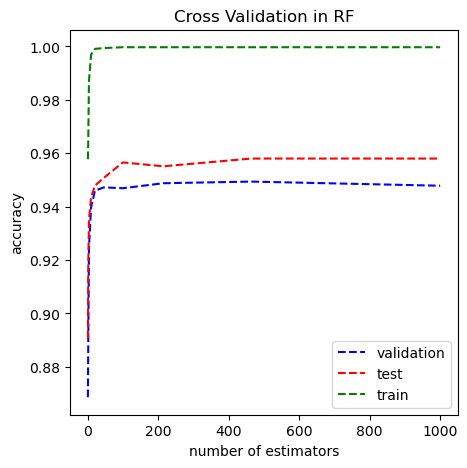

In [39]:
plt.figure(figsize = (5,5))
plt.title('Cross Validation in RF')
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.plot(range_est, rf_val_scores, 'b--',
          range_est, score_test,'r--',
       range_est, score_train,'g--')    
plt.legend(['validation', 'test', 'train'])
plt.show() 

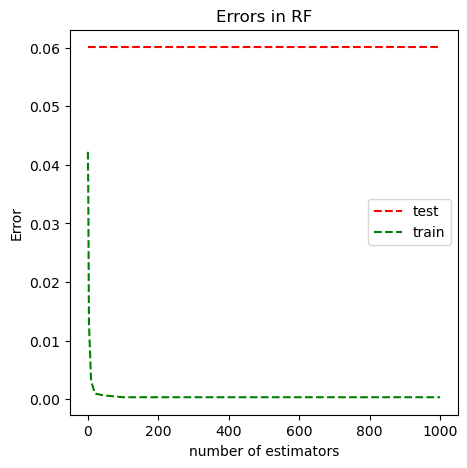

In [40]:
plt.figure(figsize = (5,5))    
plt.title('Errors in RF')   
plt.xlabel("number of estimators")
plt.ylabel("Error")
plt.plot(range_est, err_test,'r--',
        range_est, err_train,'g--') 
plt.legend(['test', 'train'])
plt.show() 

According to above plots the best parameter for Random Forest is n = 30

In [66]:
start = timeit.default_timer()

rf = RandomForestClassifier(n_estimators=30)
rf.fit(x_train, y_train)
rf_train_acc = rf.score(x_train, y_train)
print('The accuracy on tarining data is',rf_train_acc)
y_train_pred = rf.predict(x_train)
rf_train_err = sum(np.square(y_train_pred - y_train)) / x_train.shape[0]
print('The error on training data is', rf_train_err)

stop = timeit.default_timer()
rf_train_time= stop - start
print('Time: ', rf_train_time)

matrix['Random Forest']['Train Accuracy'] = rf_train_acc
matrix['Random Forest']['Train Error'] = rf_train_err
matrix['Random Forest']['Train Time'] = rf_train_time


The accuracy on tarining data is 0.9987577639751553
The error on training data is 0.0012422360248447205
Time:  1.7242112000003544


In [67]:
start = timeit.default_timer()

rf_test_acc = rf.score(x_test, y_test)
print('The accuracy on tarining data is',rf_test_acc)
y_test_pred = rf.predict(x_test)
rf_test_err = sum(np.square(y_test_pred - y_test)) / x_test.shape[0]
print('The error on testing data is', rf_test_err)

stop = timeit.default_timer()
rf_test_time= stop - start
print('Time: ', rf_test_time)

matrix['Random Forest']['Test Accuracy'] = rf_test_acc
matrix['Random Forest']['Test Error'] = rf_test_err
matrix['Random Forest']['Test Time'] = rf_test_time

The accuracy on tarining data is 0.9536567704561911
The error on testing data is 0.04634322954380883
Time:  0.12279670000043552


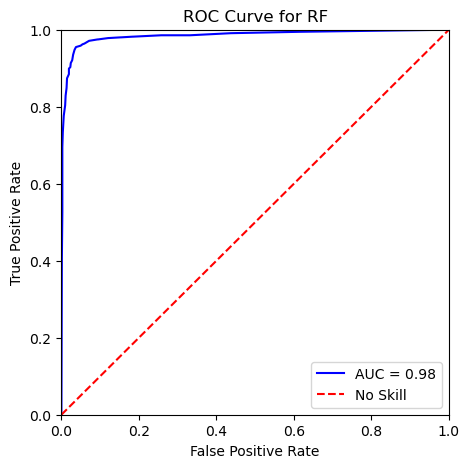

In [43]:
y_score = rf.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.title('ROC Curve for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--', label = 'No Skill')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# **Linear SVM**

In [45]:
svm_val_scores = []
err_train = []
err_test = []
score_train = []
score_test = []
penalty = [0.01, 0.1]
for p in penalty:
    lin_svm = svm.SVC(kernel="linear", C=p)
    scores = cross_val_score(
        lin_svm, x_train, y_train, cv= 5, scoring='accuracy')
    svm_val_scores.append(scores.mean())

    lin_svm.fit(x_train, y_train)
    y_train_pred = lin_svm.predict(x_train)
    mse_train = sum(np.square(y_train_pred - y_train)) / x_train.shape[0]
    err_train.append(mse_train)
    
    y_test_pred = lin_svm.predict(x_test)
    mse_test = sum(np.square(y_test_pred - y_test)) / x_test.shape[0]
    err_test.append(mse_test)

    acc = lin_svm.score(x_train, y_train)
    score_train.append(acc)
    acc = lin_svm.score(x_test, y_test) 
    score_test.append(acc) 

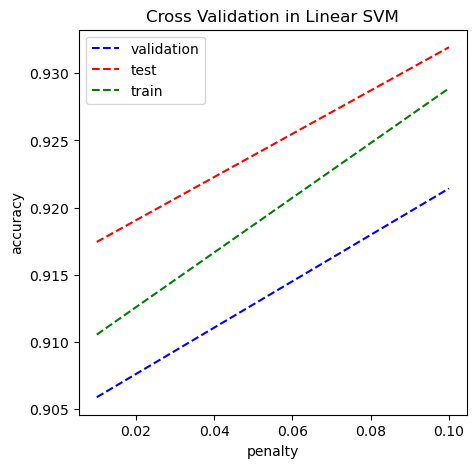

In [46]:
plt.figure(figsize = (5,5))
plt.title('Cross Validation in Linear SVM')
plt.xlabel("penalty")
plt.ylabel("accuracy")
plt.plot(penalty, svm_val_scores, 'b--',
          penalty, score_test,'r--',
        penalty, score_train,'g--')    
plt.legend(['validation', 'test', 'train'])
plt.show() 

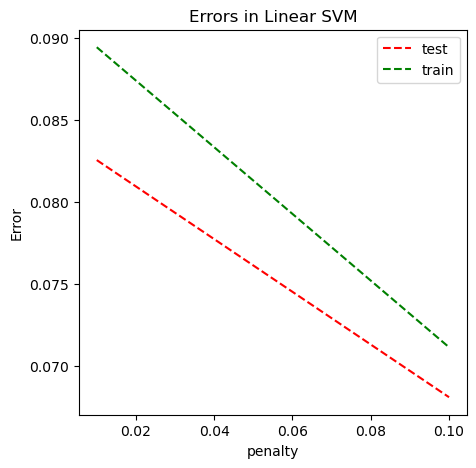

In [47]:
plt.figure(figsize = (5,5))    
plt.title('Errors in Linear SVM')   
plt.xlabel("penalty")
plt.ylabel("Error")
plt.plot(penalty, err_test,'r--',
        penalty, err_train,'g--') 
plt.legend(['test', 'train'])
plt.show() 

According to above plots the best parameter for linear SVM is c = 0.1

In [68]:
start = timeit.default_timer()

lin_svm = svm.SVC(kernel="linear", C=0.1)
lin_svm.fit(x_train, y_train)
svm_train_acc = lin_svm.score(x_train, y_train)
print('The accuracy on tarining data is',svm_train_acc)
y_train_pred = lin_svm.predict(x_train)
svm_train_err = sum(np.square(y_train_pred - y_train)) / x_train.shape[0]
print('The error on tarining data is',svm_train_err)

stop = timeit.default_timer()
svm_train_time= stop - start
print('Time: ', svm_train_time)

matrix['Linear SVM']['Train Accuracy'] = svm_train_acc
matrix['Linear SVM']['Train Error'] = svm_train_err
matrix['Linear SVM']['Train Time'] = svm_train_time

The accuracy on tarining data is 0.9288819875776397
The error on tarining data is 0.07111801242236025
Time:  132.2973479000002


In [49]:
w = lin_svm.coef_[0]
b = lin_svm.intercept_[0]
ans_lin_svm = pd.DataFrame({'coefficients':w, 'intercept':b})
ans_lin_svm

,coefficients,intercept
0,-0.147997,-1.140652
1,0.000795,-1.140652
2,-0.000757,-1.140652
3,0.166014,-1.140652
4,0.481715,-1.140652
5,0.375744,-1.140652
6,1.134747,-1.140652
7,0.530307,-1.140652
8,0.490499,-1.140652
9,-0.003040,-1.140652


In [69]:
start = timeit.default_timer()


svm_test_acc = lin_svm.score(x_test, y_test)
print('The accuracy on testing data is',svm_test_acc)
y_test_pred = lin_svm.predict(x_test)
svm_test_err = sum(np.square(y_test_pred - y_test)) / x_test.shape[0]
print('The error on testing data is',svm_test_err)

stop = timeit.default_timer()
svm_test_time= stop - start
print('Time: ', svm_test_time)

matrix['Linear SVM']['Test Accuracy'] = svm_test_acc
matrix['Linear SVM']['Test Error'] = svm_test_err
matrix['Linear SVM']['Test Time'] = svm_test_time



The accuracy on testing data is 0.9319333816075308
The error on testing data is 0.06806661839246922
Time:  0.43411099999957514


# **NonLinear SVM**

In [70]:
start = timeit.default_timer()

nonlin_svm = svm.SVC(kernel='rbf', gamma=1, degree=2)
nonlin_svm.fit(x_train, y_train)
nsvm_train_acc = nonlin_svm.score(x_train, y_train)
print('The accuracy on tarining data is', nsvm_train_acc)
y_train_pred = nonlin_svm.predict(x_train)
nsvm_train_err = sum(np.square(y_train_pred - y_train)) / x_train.shape[0]
print('The error on training data is', nsvm_train_err)

stop = timeit.default_timer()
nsvm_train_time= stop - start
print('Time: ', nsvm_train_time)

matrix['Nonlinear SVM']['Train Accuracy'] = nsvm_train_acc
matrix['Nonlinear SVM']['Train Error'] = nsvm_train_err
matrix['Nonlinear SVM']['Train Time'] = nsvm_train_time


The accuracy on tarining data is 0.9996894409937889
The error on training data is 0.00031055900621118014
Time:  28.573327699999936


In [71]:
start = timeit.default_timer()

nsvm_test_acc = nonlin_svm.score(x_test, y_test)
print('The accuracy on testing data is', nsvm_test_acc)
y_test_pred = nonlin_svm.predict(x_test)
nsvm_test_err = sum(np.square(y_test_pred - y_test)) / x_test.shape[0]
print('The error on testing data is', nsvm_test_err)

stop = timeit.default_timer()
nsvm_test_time= stop - start
print('Time: ', nsvm_test_time)

matrix['Nonlinear SVM']['Test Accuracy'] = nsvm_test_acc
matrix['Nonlinear SVM']['Test Error'] = nsvm_test_err
matrix['Nonlinear SVM']['Test Time'] = nsvm_test_time

The accuracy on testing data is 0.7074583635047067
The error on testing data is 0.29254163649529324
Time:  7.817632400000548


In [72]:
matrix

,KNN,Decision Tree,Naive Bayes,Logistic Regression,Adaboost,Random Forest,Linear SVM,Nonlinear SVM
Train Accuracy,0.822671,0.990683,0.879503,0.921118,0.975776,0.998758,0.928882,0.999689
Test Accuracy,0.781318,0.929761,0.91021,0.926865,0.939899,0.953657,0.931933,0.707458
Train Error,0.177329,0.009317,0.120497,0.078882,0.024224,0.001242,0.071118,0.000311
Test Error,0.218682,0.070239,0.08979,0.073135,0.073135,0.046343,0.068067,0.292542
Train Time,4.060816,0.290005,0.081726,1.729307,7.368292,1.724211,132.297348,28.573328
Test Time,1.478382,0.028578,0.048474,0.031274,1.693224,0.122797,0.434111,7.817632


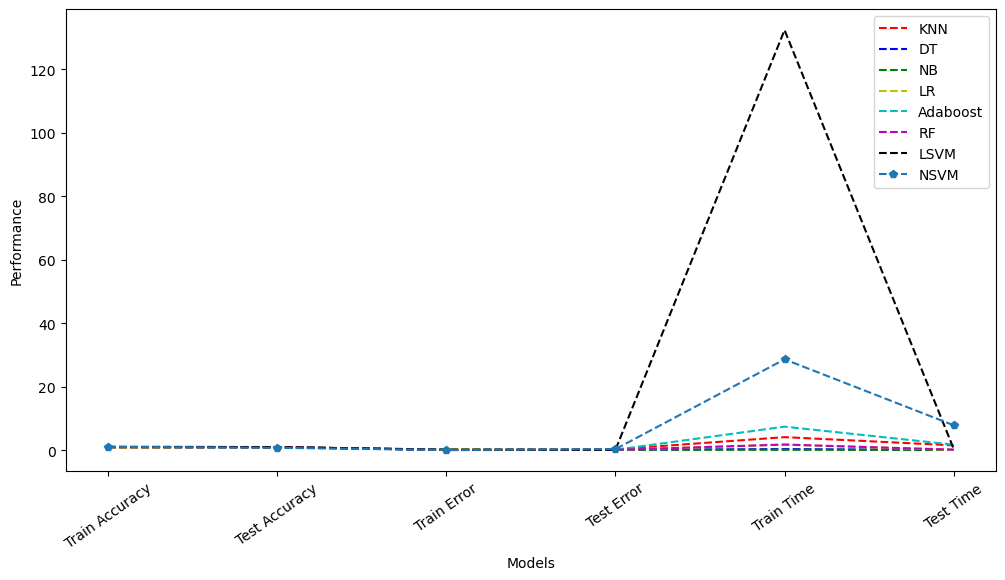

In [87]:
plt.figure(figsize=(12,6))
plt.plot(matrix['KNN'], 'r--', matrix['Decision Tree'], 'b--',
          matrix['Naive Bayes'], 'g--', matrix['Logistic Regression'], 'y--',
          matrix['Adaboost'], 'c--', matrix['Random Forest'], 'm--',
          matrix['Linear SVM'], 'k--', matrix['Nonlinear SVM'], 'p--',)

plt.xlabel('Models')
plt.ylabel('Performance')
plt.legend(['KNN', 'DT', 'NB', 'LR', 'Adaboost', 'RF', 'LSVM', 'NSVM'])
plt.xticks(rotation = 35)
plt.show();

What has been displayed in the above plot is related to performances of algorithms. 
As it is crystal clear all the models performs slightly same as each other in accuracy and error. But there is a significant difference in training time (and testing time) of these algorithms. In oher words Linear SVM and Nonlnear SVM have the highest training times while others are quite less time consuming.

As it has been demonstrated Adaboost and Random Forest have the best performances on training data, which means the training errors in these two algorithms are the lowest and training accuracy provides the best ansawers. On the other hand Adaboost takes longer to fit the data and predict in comparisan to Random Forest so Adaboost is a more time_consuming algorithm for this data. Moreover, Random Forest has a maintainance testing error for various number of trees(estimators) 

Also KNN and Decision Tree are considered to be the worst models for spam detection data, since they occcur to have low accuracy on training data according to other algorithms. However, Decision Tree gives better results in errors than KNN.

Logistic Regression and Naive Bayes algorithms performes slightly like each other, and both are better than KNN and Decisio Tree but gives weaker performances in comparison to Adaboost and Random forest. Naive Bayes has higher training error than Logistic Regression and both are considered as fast models. But Logistic Regression provides lower errors.

In addition, Linear SVM and NonLinear SVM are reported to be time_consuming models for the given data and the training error of these two models are not the lowest error among other algorithms.

To put it in a nutshell, it is assumed that Adaboost and Random Forest are best fits for our sample dtection dataset.
 